<a href="https://colab.research.google.com/github/yelosolutions/Machine-Learning/blob/main/Goldprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from  sklearn import metrics





In [ ]:
gold_data= pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = gold_data.corr()

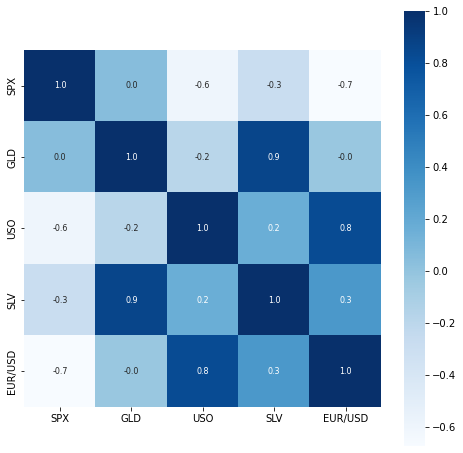

In [ ]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation , cbar = True , square= True, fmt = '.1f', annot=True ,annot_kws={'size':8} , cmap='Blues' )



In [ ]:
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


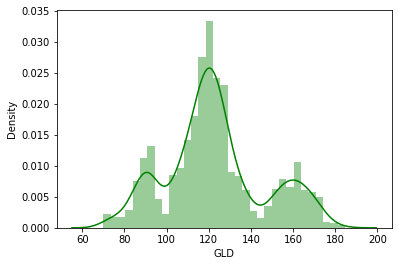

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X= gold_data.drop(['Date', 'GLD'], axis=1)
Y= gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=2)


In [ ]:
regressor = RandomForestRegressor(n_estimators= 100)

In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.29339948  81.97510001 115.79059987 127.63670067 120.84510148
 154.54949809 150.3324984  126.30310013 117.55799861 126.10970045
 116.85880108 170.83620101 141.21269828 167.68989842 115.11190021
 117.51990066 139.24700288 170.26000073 158.7503025  162.75639949
 155.18560034 125.14260038 176.36220012 157.71430376 125.20220007
  93.63299954  77.56180022 120.34140018 119.10379957 167.4683991
  88.03760047 125.34999982  91.07580102 117.50769999 121.14839894
 136.49320056 115.24250118 115.05470073 145.18459933 107.47410073
 103.79730249  87.1571978  126.62420064 117.55600022 154.38029928
 119.57320015 108.44879979 107.96749771  93.25060059 127.10529784
  74.82170046 113.58649961 121.39520021 111.30809904 118.89749887
 120.87079952 159.16960017 167.87770112 147.15279691  85.80699838
  94.26150025  86.64669866  90.64210042 118.88620081 126.44170059
 127.6098998  169.99229976 122.34389932 117.30849897  98.51190037
 168.81330184 143.16729817 131.82780288 121.14760205 121.44119944
 119.630900

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R squared error:',error_score)

R squared error: 0.9899387420531531


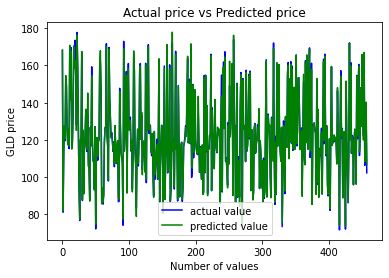

In [ ]:
Y_test = list(Y_test)
plt.plot(Y_test, color = 'blue', label= 'actual value')
plt.plot(test_data_prediction, color= 'green' , label = 'predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()